Install the libraries first:


In [ ]:
!pip install ucimlrepo
!pip install lightgbm

# Starting with Logistic Regression:

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Accuracy: 0.8650

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.54      0.16      0.24      6997

    accuracy                           0.86     50736
   macro avg       0.71      0.57      0.58     50736
weighted avg       0.83      0.86      0.83     50736

Confusion Matrix:
[[42793   946]
 [ 5904  1093]]

ROC AUC Score: 0.8209


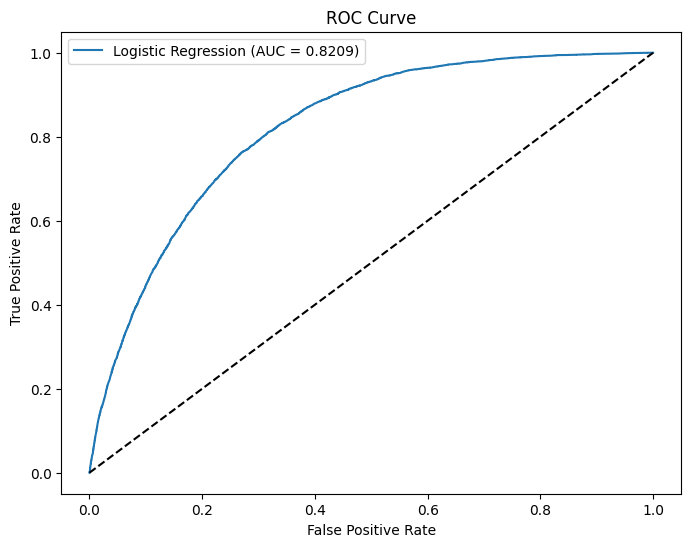

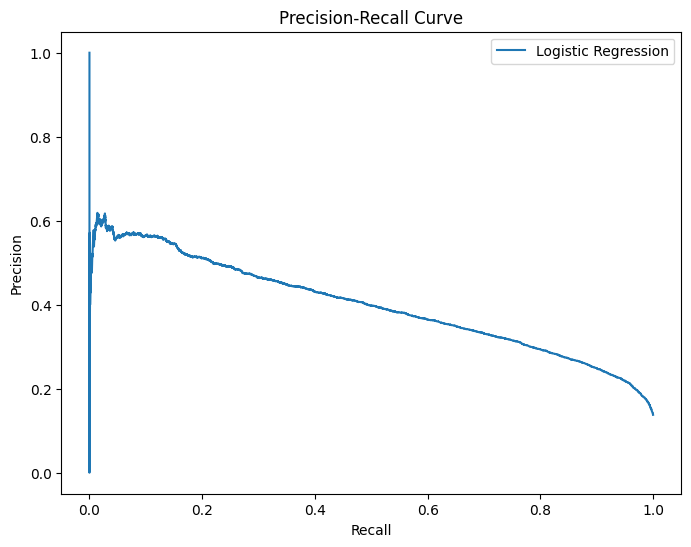

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt
import pandas as pd

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# create pandas dataframe
df = pd.concat([X, y], axis=1)

# Define features (X) and target (y)
selected_features = [
    'HighBP', 'GenHlth', 'DiffWalk', 'BMI', 'HighChol', 'Age',
    'PhysHlth', 'HeartDiseaseorAttack', 'NoDocbcCost', 'MentHlth'
]

# split into features and target
X = df[selected_features]
y = df['Diabetes_binary']

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and train the Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc_log = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc_log:.4f}")


# Plot ROC Curve
fpr_log, tpr_log, thresholds_log = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision_log, recall_log, thresholds_pr_log = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label="Logistic Regression")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Now, moving onto Random Forest:


Model 2 Accuracy: 0.8496

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92     43739
           1       0.41      0.21      0.28      6997

    accuracy                           0.85     50736
   macro avg       0.65      0.58      0.60     50736
weighted avg       0.82      0.85      0.83     50736

Confusion Matrix:
[[41639  2100]
 [ 5532  1465]]

ROC AUC Score: 0.7695


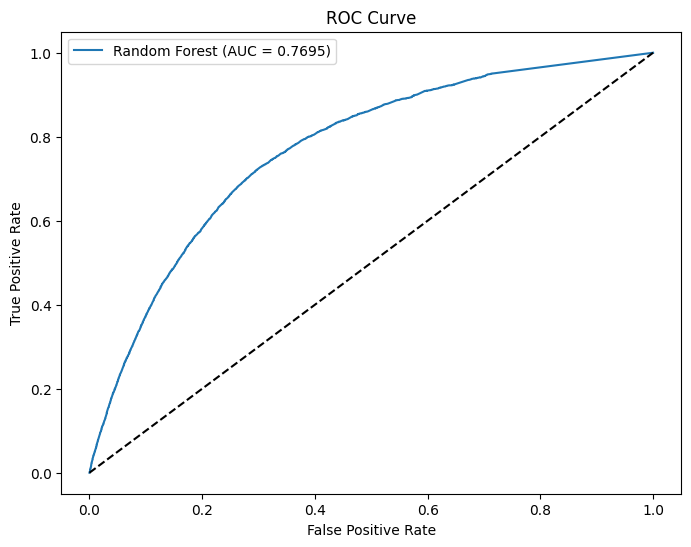

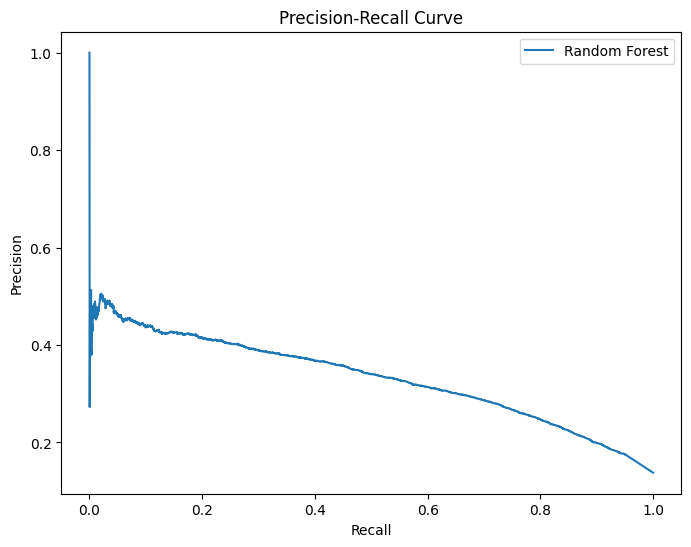

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# create pandas dataframe
df = pd.concat([X, y], axis=1)

# Define features (X) and target (y)
selected_features = [
    'HighBP', 'GenHlth', 'DiffWalk', 'BMI', 'HighChol', 'Age',
    'PhysHlth', 'HeartDiseaseorAttack', 'NoDocbcCost', 'MentHlth'
]
X = df[selected_features]
y = df['Diabetes_binary']

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create and Train the Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel 2 Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc_rf = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc_rf:.4f}")

# Plot ROC Curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision_rf, recall_rf, thresholds_pr_rf = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# And finally, Light GBM:

[LightGBM] [Info] Number of positive: 28349, number of negative: 174595
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 168
[LightGBM] [Info] Number of data points in the train set: 202944, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.139689 -> initscore=-1.817877
[LightGBM] [Info] Start training from score -1.817877

Model 2 Accuracy: 0.8674

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93     43739
           1       0.57      0.15      0.23      6997

    accuracy                           0.87     50736
   macro avg       0.73      0.57      0.58     50736
weighted avg       0.84      0.87      0.83     50736

Confusion Matrix:
[[42974   765]
 [ 5965  1032]]

ROC AUC Score:

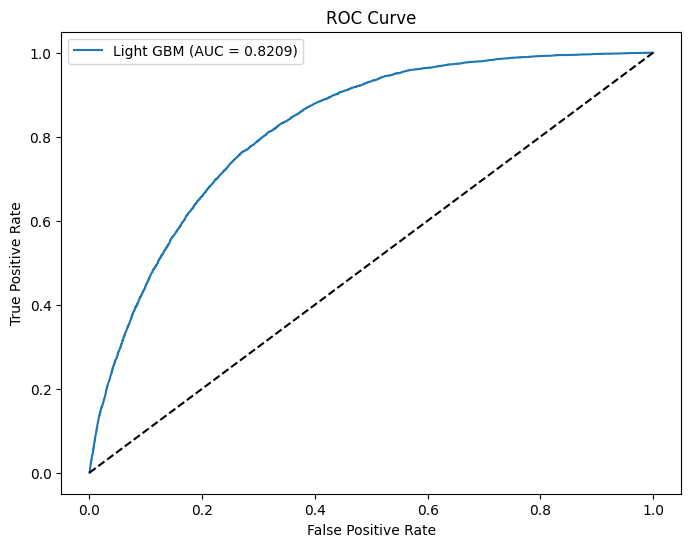

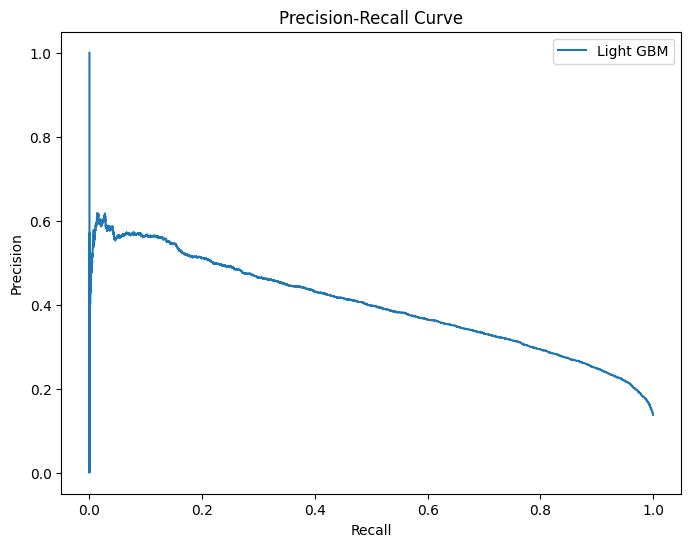

In [ ]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
)
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMClassifier

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# create pandas dataframe
df = pd.concat([X, y], axis=1)

# Define features (X) and target (y)
selected_features = [
    'HighBP', 'GenHlth', 'DiffWalk', 'BMI', 'HighChol', 'Age',
    'PhysHlth', 'HeartDiseaseorAttack', 'NoDocbcCost', 'MentHlth'
]
X = df[selected_features]
y = df['Diabetes_binary']

# Split the original data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create an instance of the LightGBM Classifier and train
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel 2 Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc_lgbm = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc_lgbm:.4f}")

# Plot ROC Curve
fpr_lgbm, tpr_lgbm, thresholds_lbgm = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgbm, tpr_lgbm, label=f"Light GBM (AUC = {roc_auc_lgbm:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot Precision-Recall Curve
precision_lgbm, recall_lgbm, thresholds_pr_lgbm = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall_lgbm, precision_lgbm, label="Light GBM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

# Plotting them on the same graph, we get the following:

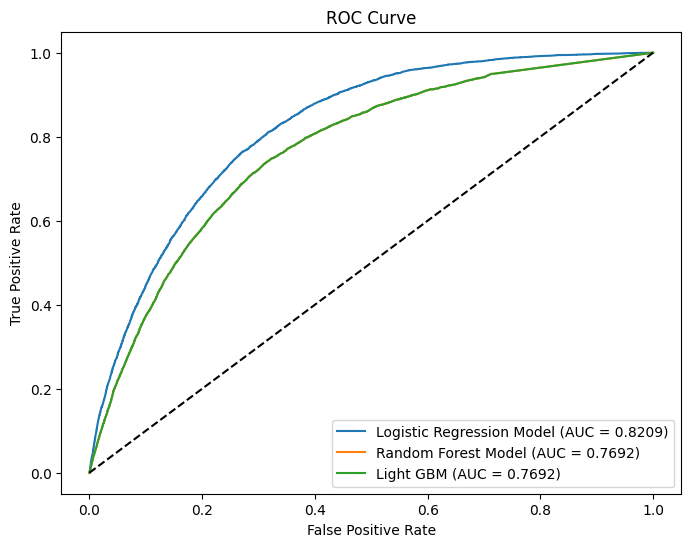

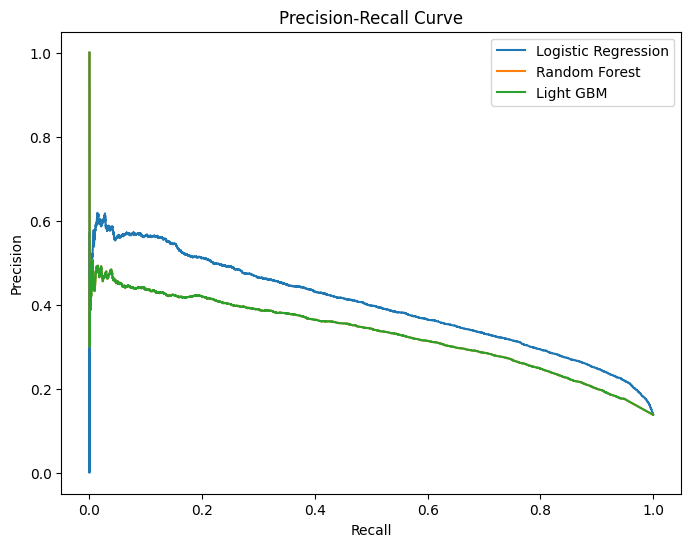

In [ ]:
# Plot the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression Model (AUC = {roc_auc_log:.4f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest Model (AUC = {roc_auc_rf:.4f})")
plt.plot(fpr_lgbm, tpr_lgbm, label=f"Light GBM (AUC = {roc_auc_lgbm:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Plot the Precision-Recall Curves
plt.figure(figsize=(8, 6))
plt.plot(recall_log, precision_log, label="Logistic Regression")
plt.plot(recall_rf, precision_rf, label="Random Forest")
plt.plot(recall_lgbm, precision_lgbm, label="Light GBM")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

It is evident that prior to any tuning, Logistic Regression appears to perform the best, so we proceeded to go with Logistic Regression as opposed to the other two models.